In [1]:
import pandas as pd
import sys; sys.path.insert(0, '..')
from stattest import Analysis
from clustering import ClusteringPipe

df = pd.read_csv('data_processed.csv')
visitor, weekend, revenue = pd.Categorical(df.VisitorType),  pd.Categorical(df.Weekend),  pd.Categorical(df.Revenue)
y = pd.DataFrame({'visitor':visitor.codes, 'weekend':weekend.codes, 'revenue':revenue.codes})
x_raw = df.drop(['VisitorType','Weekend', 'Revenue'], axis=1)

data = ClusteringPipe(x_raw, y)

## K-Means

### outlires removal

In [2]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=30) \
                    .remove_outlires(p) \
                    .cluster('kmeans', n_clusters=7, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

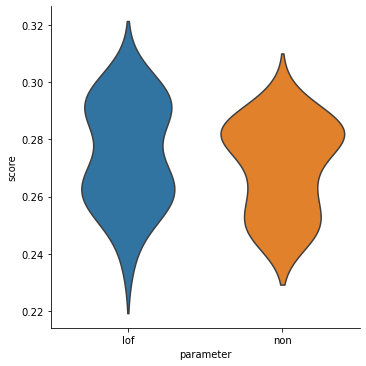

In [3]:
results.plot()

In [4]:
results.mean()

lof    0.274767
non    0.270559
dtype: float64

In [5]:
results.annova()

(0.9388571709668331, 0.33659525427075765)

### dimension reduction method

In [6]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce(p, n_components=5, random_state=i) \
                    .remove_outlires('lof') \
                    .cluster('kmeans', n_clusters=7, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap']})

/home/nlp/elronbandel/miniconda3/envs/squadlab/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


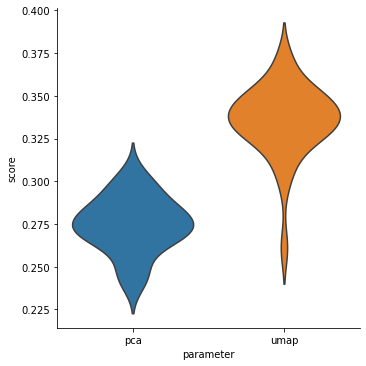

In [8]:
results.plot()

### number of clusters

detect potentially good k values with the elbow mehtod:

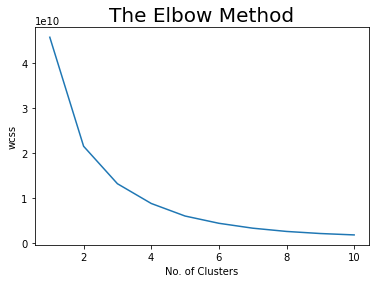

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x_raw)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

now we will test which one is the best using the full process

In [10]:
results = Analysis({k:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=5) \
                    .cluster('kmeans', n_clusters=k, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for k in [4,5,6,7]})

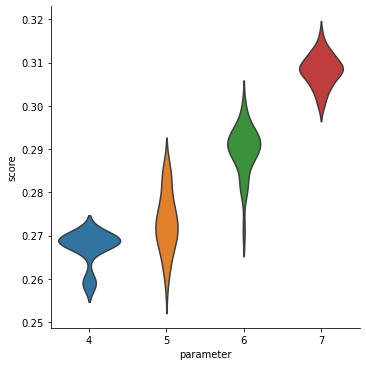

In [11]:
results.plot()

In [12]:
results.mean()

4    0.267264
5    0.273156
6    0.289618
7    0.308159
dtype: float64

In [13]:
results.annova()

(377.5372954826841, 1.1532797167275275e-59)

In [14]:
results.scheffe()

,4,5,6,7
4,1.000000e+00,4.316841e-04,8.999774e-31,2.347348e-55
5,4.316841e-04,1.000000e+00,5.644882e-21,1.604396e-48
6,8.999774e-31,5.644882e-21,1.000000e+00,1.600416e-24
7,2.347348e-55,1.604396e-48,1.600416e-24,1.000000e+00


### visualize cluster

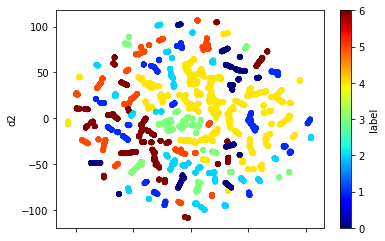

In [15]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=5) \
    .cluster('kmeans', n_clusters=7) \
    .visualize('tsne')

### corelationg with target class

In [16]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('kmeans', n_clusters=2) \
    .score('v', label='visitor')

0.0030485937245678775

In [17]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('kmeans', n_clusters=2) \
    .score('v', label='revenue')

4.3648907270678276e-05

In [18]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('kmeans', n_clusters=2) \
    .score('v', label='weekend')

0.00014406495096005312

## GMM

### outlires removal

In [19]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=30) \
                    .cluster('gmm', n_components=6, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

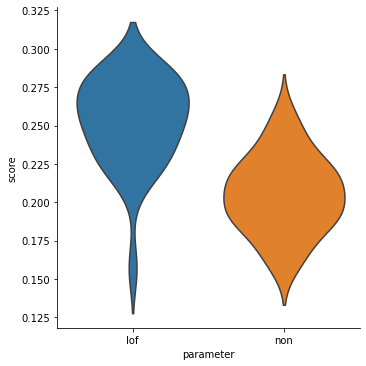

In [20]:
results.plot()

In [21]:
results.mean()

lof    0.252692
non    0.205250
dtype: float64

In [22]:
results.annova()

(46.31516883134241, 6.213744242944388e-09)

### Dimension Reduction Method

In [23]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce(p, n_components=30, random_state=i) \
                    .cluster('gmm', n_components=6, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap', 'non']})

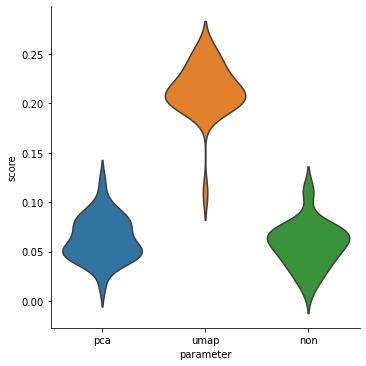

In [24]:
results.plot()

### Number of dimensions

In [25]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=p, random_state=i) \
                    .cluster('gmm', n_components=6, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5,10,20,30]})

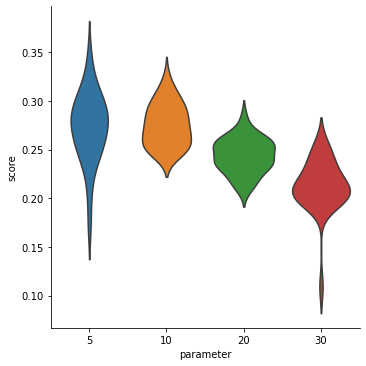

In [26]:
results.plot()

In [27]:
results.mean()

5     0.273204
10    0.275434
20    0.243829
30    0.213330
dtype: float64

In [28]:
results.annova()

(37.053286472176715, 7.192697309169914e-17)

In [29]:
results.scheffe()

,5,10,20,30
5,1.000000e+00,9.908137e-01,0.000573,6.470186e-13
10,9.908137e-01,1.000000e+00,0.000172,1.158548e-13
20,5.730419e-04,1.723922e-04,1.000000,3.155231e-04
30,6.470186e-13,1.158548e-13,0.000316,1.000000e+00


### Coveriance Type

In [30]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=5) \
                    .cluster('gmm', n_components=6, covariance_type=p, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['spherical', 'tied', 'diag', 'full']
})

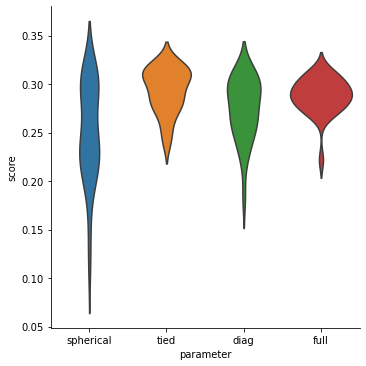

In [31]:
results.plot()

In [32]:
results.mean()

spherical    0.250887
tied         0.293486
diag         0.274747
full         0.288124
dtype: float64

In [33]:
results.annova()

(9.832950093810545, 7.887854098913044e-06)

In [34]:
results.scheffe()

,spherical,tied,diag,full
spherical,1.000000,0.000051,0.056504,0.000537
tied,0.000051,1.000000,0.194350,0.941704
diag,0.056504,0.194350,1.000000,0.489266
full,0.000537,0.941704,0.489266,1.000000


### number of clusters

detect potentially good k values with the elbow mehtod:

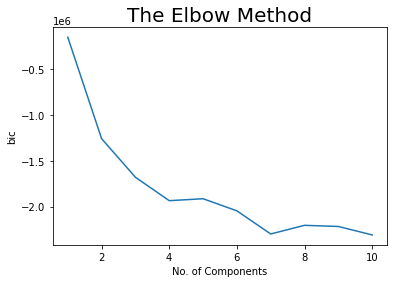

In [35]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

bic = []
for i in range(1, 11):
    gmm = GaussianMixture(n_components = i)
    gmm.fit(x_raw)
    bic.append(gmm.bic(x_raw))
    
plt.plot(range(1, 11), bic)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Components')
plt.ylabel('bic')
plt.show()

now we will test which one is the best using the full process

In [36]:
results = Analysis({k:[ \
                data.normalize('std') \
                    .reduce('umap', n_components=30) \
                    .cluster('gmm', n_components=k, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for k in [3,4,5,6,7,8]})

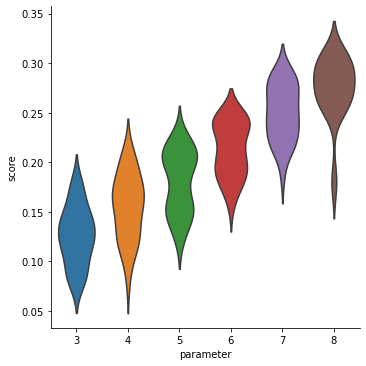

In [37]:
results.plot()

In [38]:
results.mean()

3    0.126355
4    0.155283
5    0.180248
6    0.213209
7    0.250127
8    0.275031
dtype: float64

In [39]:
results.annova()

(106.0187697982982, 6.257043021167346e-51)

In [40]:
results.scheffe()

,3,4,5,6,7,8
3,1.000000e+00,2.033399e-02,4.604050e-08,8.141789e-19,4.479760e-32,8.878303e-41
4,2.033399e-02,1.000000e+00,7.423438e-02,3.089316e-09,1.157318e-21,1.231259e-30
5,4.604050e-08,7.423438e-02,1.000000e+00,4.242127e-03,5.386661e-13,1.216212e-21
6,8.141789e-19,3.089316e-09,4.242127e-03,1.000000e+00,7.277282e-04,2.027508e-10
7,4.479760e-32,1.157318e-21,5.386661e-13,7.277282e-04,1.000000e+00,7.555796e-02
8,8.878303e-41,1.231259e-30,1.216212e-21,2.027508e-10,7.555796e-02,1.000000e+00


### Cluster visualisation 

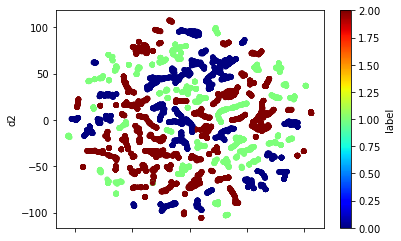

In [41]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('gmm', n_components=3) \
    .visualize('tsne')

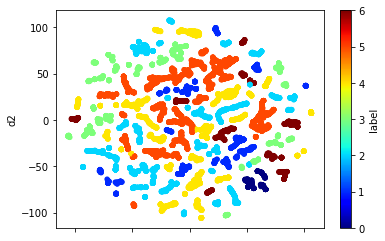

In [42]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('gmm', n_components=7) \
    .visualize('tsne')

### corelationg with target class

In [143]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('gmm', n_components=2) \
    .score('v', label='visitor')

0.002662489062329946

In [146]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('gmm', n_components=2) \
    .score('v', label='revenue')

0.007051896828546359

In [144]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('gmm', n_components=2) \
    .score('v', label='weekend')

0.0002564773117438758

## Louvaine

### outlires removal

In [46]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=5, random_state=i) \
                    .cluster('louvain', random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

/home/nlp/elronbandel/miniconda3/envs/squadlab/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


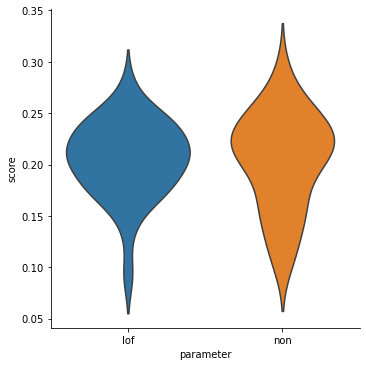

In [47]:
results.plot()

In [48]:
results.mean()

lof    0.205029
non    0.203749
dtype: float64

In [49]:
results.annova()

(0.013858102555293038, 0.9066958985742389)

### Dimension Reduction Method

In [50]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce(p, n_components=10, random_state=i) \
                    .cluster('louvain') \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap', 'non']})

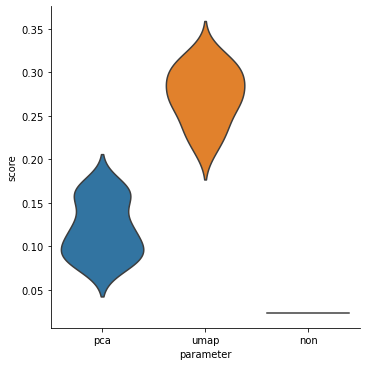

In [51]:
results.plot()

### Number of dimensions

In [52]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=p, random_state=i) \
                    .cluster('louvain', random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5,10,15, 20]})

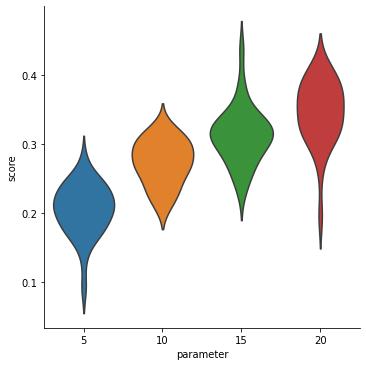

In [53]:
results.plot()

In [54]:
results.mean()

5     0.205029
10    0.273094
15    0.312437
20    0.345762
dtype: float64

In [55]:
results.annova()

(69.94995295533643, 6.713875225075901e-26)

In [56]:
results.scheffe()

,5,10,15,20
5,1.000000e+00,3.334376e-08,9.040976e-17,2.889057e-24
10,3.334376e-08,1.000000e+00,2.928269e-03,3.866365e-09
15,9.040976e-17,2.928269e-03,1.000000e+00,1.694837e-02
20,2.889057e-24,3.866365e-09,1.694837e-02,1.000000e+00


### Modularity Type

In [57]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=15, random_state=i) \
                    .cluster('louvain', modularity=p, random_state=i) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['dugue', 'newman', 'potts']
})

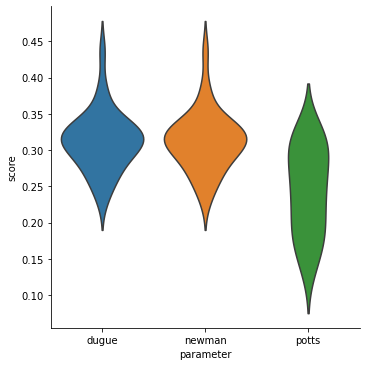

In [58]:
results.plot()

In [59]:
results.mean()

dugue     0.312437
newman    0.312437
potts     0.243813
dtype: float64

In [60]:
results.annova()

(20.185815177419215, 6.286728413646642e-08)

### Cluster visualisation 

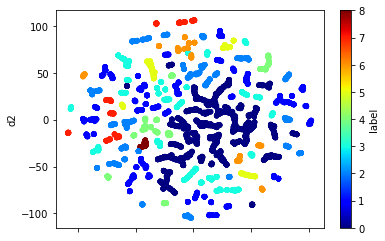

In [61]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=15) \
    .cluster('louvain', modularity='newman') \
    .visualize('tsne')

### corelationg with target class

In [148]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('louvain') \
    .score('v', label='visitor')

0.01612403204477736

In [149]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('louvain') \
    .score('v', label='revenue')

0.008461462790789347

In [150]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('louvain') \
    .score('v', label='weekend')

0.00022604576584706976

## Prim

### outlires removal

In [65]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=15, random_state=i) \
                    .cluster('prim', cutoff_scale=0.8) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

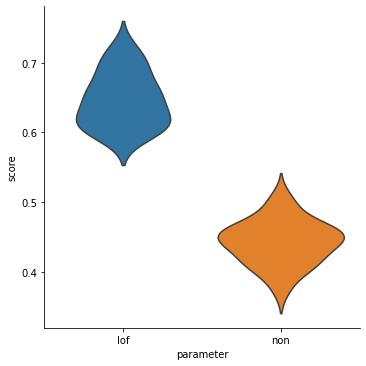

In [66]:
results.plot()

In [67]:
results.mean()

lof    0.646873
non    0.442645
dtype: float64

In [68]:
results.annova()

(501.78184130714277, 3.077086791566943e-30)

### Dimension Reduction Method

In [69]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce(p, n_components=40, random_state=i) \
                    .cluster('prim', cutoff_scale=2) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['pca', 'umap', 'non']})

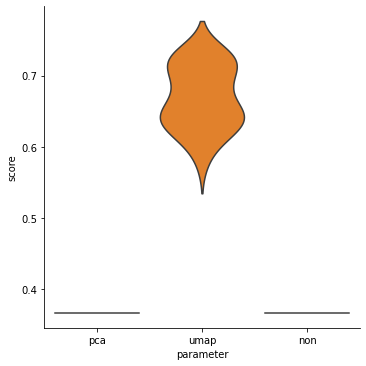

In [70]:
results.plot()

### Number of dimensions

In [71]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=p, random_state=i) \
                    .cluster('prim', cutoff_scale=2) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5, 10, 15, 20, 30, 40]})

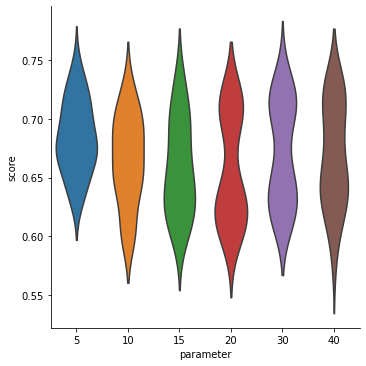

In [72]:
results.plot()

In [73]:
results.mean()

5     0.684319
10    0.664846
15    0.658590
20    0.656708
30    0.670462
40    0.668862
dtype: float64

In [74]:
results.annova()

(1.77642237833838, 0.12002705174103735)

In [75]:
results.scheffe()

,5,10,15,20,30,40
5,1.000000,0.640053,0.318431,0.239839,0.885745,0.828927
10,0.640053,1.000000,0.996527,0.988145,0.997924,0.999592
15,0.318431,0.996527,1.000000,0.999990,0.938213,0.966501
20,0.239839,0.988145,0.999990,1.000000,0.888948,0.931961
30,0.885745,0.997924,0.938213,0.888948,1.000000,0.999996
40,0.828927,0.999592,0.966501,0.931961,0.999996,1.000000


### Cutoff Scale

In [76]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=40, random_state=i) \
                    .cluster('prim', cutoff_scale=p) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [0.6, 0.7, 0.8, 0.9]
})

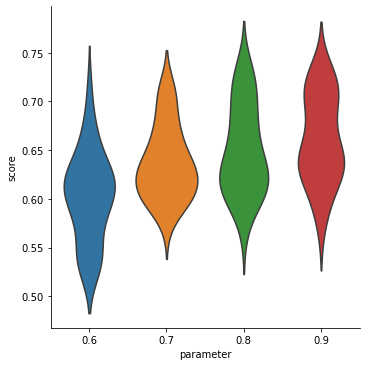

In [77]:
results.plot()

In [78]:
results.mean()

0.6    0.602742
0.7    0.637076
0.8    0.649915
0.9    0.661335
dtype: float64

In [79]:
results.annova()

(10.081137668116769, 5.920605268393504e-06)

### Cluster visualisation 

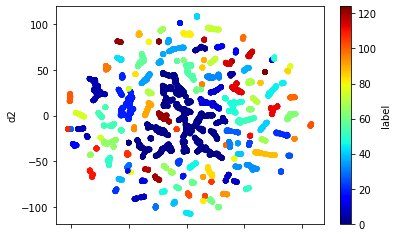

In [80]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=40) \
    .cluster('prim', cutoff_scale=0.8) \
    .visualize('tsne')

### corelationg with target class

In [153]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('prim', cutoff_scale=0.8) \
    .score('v', label='visitor')

0.03918420815835956

In [152]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('prim', cutoff_scale=0.8) \
    .score('v', label='revenue')

0.010560362381220125

In [151]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('prim', cutoff_scale=0.8) \
    .score('v', label='weekend')

0.0074755277973464155

## DBSCAN

### outlires removal

In [84]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires(p) \
                    .reduce('umap', n_components=40, random_state=i) \
                    .cluster('dbscan', eps=0.5, min_samples=5) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in ['lof', 'non']})

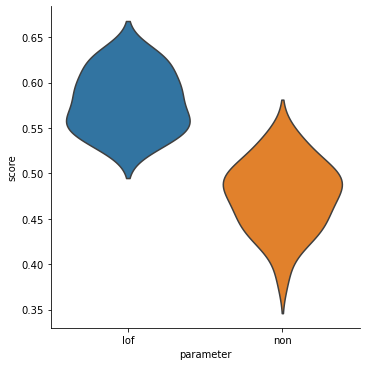

In [85]:
results.plot()

In [86]:
results.mean()

lof    0.579313
non    0.475743
dtype: float64

In [87]:
results.annova()

(128.7361011809147, 2.34263966344508e-16)

### Number of dimensions

In [116]:
results = Analysis({p:[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=p, random_state=i) \
                    .cluster('dbscan', eps=0.75, min_samples=5) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for p in [5, 10, 20, 30, 40]})

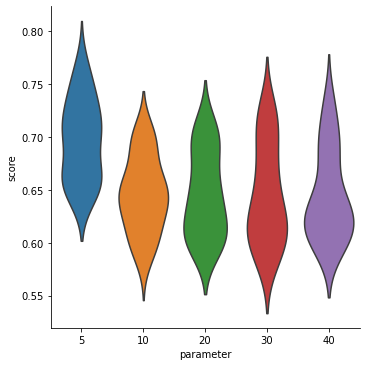

In [117]:
results.plot()

In [118]:
results.mean()

5     0.696917
10    0.645625
20    0.645411
30    0.645789
40    0.645289
dtype: float64

In [119]:
results.annova()

(9.373746847306911, 9.1151970400073e-07)

In [120]:
results.scheffe()

,5,10,20,30,40
5,1.000000,0.00022,0.000204,0.000234,0.000195
10,0.000220,1.00000,1.000000,1.000000,1.000000
20,0.000204,1.00000,1.000000,1.000000,1.000000
30,0.000234,1.00000,1.000000,1.000000,0.999999
40,0.000195,1.00000,1.000000,0.999999,1.000000


### Epsilon and Min samples

In [95]:
import itertools
results = Analysis({f'{eps}_{mins}':[ \
                data.normalize('std') \
                    .remove_outlires('lof')
                    .reduce('umap', n_components=5, random_state=i) \
                    .cluster('dbscan', eps=eps, min_samples=mins) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for eps, mins in itertools.product([0.25,0.5,0.75], [4,5,6])
})

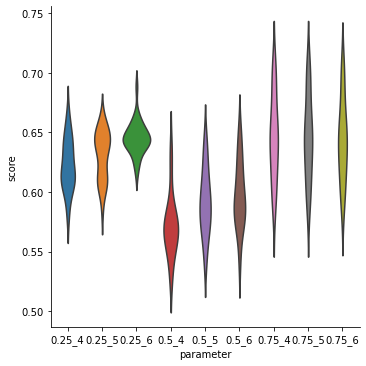

In [96]:
results.plot()

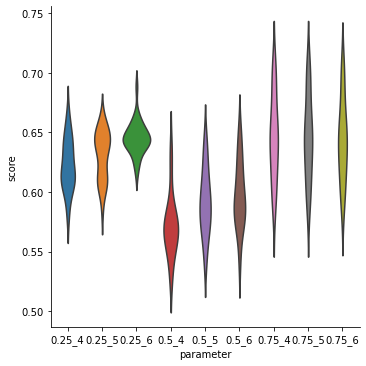

In [97]:
results.plot()

In [98]:
results.mean()

0.25_4    0.622813
0.25_5    0.630995
0.25_6    0.645105
0.5_4     0.571601
0.5_5     0.591727
0.5_6     0.597219
0.75_4    0.645625
0.75_5    0.645625
0.75_6    0.643261
dtype: float64

In [99]:
results.annova()

(30.26473004197537, 2.818079405825419e-33)

In [100]:
results.scheffe()

,0.25_4,0.25_5,0.25_6,0.5_4,0.5_5,0.5_6,0.75_4,0.75_5,0.75_6
0.25_4,1.000000e+00,9.954599e-01,2.975667e-01,1.586328e-07,1.925161e-02,0.129240,2.651157e-01,2.651157e-01,4.272620e-01
0.25_5,9.954599e-01,1.000000e+00,8.686172e-01,2.530457e-10,3.743843e-04,0.006057,8.425297e-01,8.425297e-01,9.386520e-01
0.25_6,2.975667e-01,8.686172e-01,1.000000e+00,7.607472e-16,3.119683e-08,0.000002,1.000000e+00,1.000000e+00,1.000000e+00
0.5_4,1.586328e-07,2.530457e-10,7.607472e-16,1.000000e+00,4.517376e-01,0.128361,4.615441e-16,4.615441e-16,4.405161e-15
0.5_5,1.925161e-02,3.743843e-04,3.119683e-08,4.517376e-01,1.000000e+00,0.999750,2.092848e-08,2.092848e-08,1.249926e-07
0.5_6,1.292403e-01,6.056778e-03,1.705975e-06,1.283609e-01,9.997504e-01,1.000000,1.188728e-06,1.188728e-06,5.951810e-06
0.75_4,2.651157e-01,8.425297e-01,1.000000e+00,4.615441e-16,2.092848e-08,0.000001,1.000000e+00,1.000000e+00,9.999996e-01
0.75_5,2.651157e-01,8.425297e-01,1.000000e+00,4.615441e-16,2.092848e-08,0.000001,1.000000e+00,1.000000e+00,9.999996e-01
0.75_6,4.272620e-01,9.386520e-01,1.000000e+00,4.405161e-15,1.249926e-07,0.000006,9.999996e-01,9.999996e-01,1.000000e+00


### Epsilon

In [101]:
import itertools
results = Analysis({f'{eps}':[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=5, random_state=i) \
                    .cluster('dbscan', eps=eps, min_samples=5) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for eps in [0.25,0.5, 0.75, 0.9] \
})

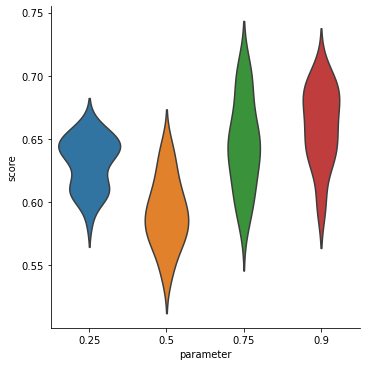

In [102]:
results.plot()

In [103]:
results.mean()

0.25    0.630995
0.5     0.591727
0.75    0.645625
0.9     0.659827
dtype: float64

In [104]:
results.annova()

(30.692797652378253, 1.1114498923808092e-14)

In [105]:
results.scheffe()

,0.25,0.5,0.75,0.9
0.25,1.000000,1.724474e-05,2.874049e-01,2.900012e-03
0.5,0.000017,1.000000e+00,2.472946e-09,1.582568e-13
0.75,0.287405,2.472946e-09,1.000000e+00,3.136209e-01
0.9,0.002900,1.582568e-13,3.136209e-01,1.000000e+00


### Min Samples

In [106]:
import itertools
results = Analysis({f'{m}':[ \
                data.normalize('std') \
                    .remove_outlires('lof') \
                    .reduce('umap', n_components=5, random_state=i) \
                    .cluster('dbscan', eps=0.75, min_samples=m) \
                    .score('silhouette').mean()\
                   for i in range(30)] \
                for m in [4,5,6,7,11] \
})

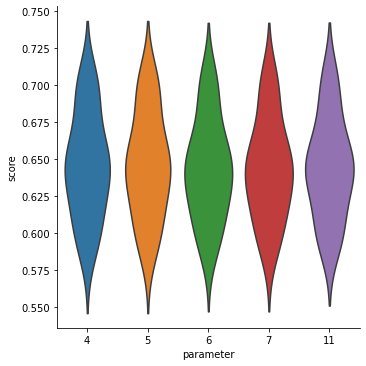

In [107]:
results.plot()

In [108]:
results.mean()

4     0.645625
5     0.645625
6     0.643261
7     0.643261
11    0.644135
dtype: float64

In [109]:
results.annova()

(0.03505051707916549, 0.9976254449423162)

In [110]:
results.scheffe()

,4,5,6,7,11
4,1.000000,1.000000,0.999408,0.999408,0.999905
5,1.000000,1.000000,0.999408,0.999408,0.999905
6,0.999408,0.999408,1.000000,1.000000,0.999989
7,0.999408,0.999408,1.000000,1.000000,0.999989
11,0.999905,0.999905,0.999989,0.999989,1.000000


### Cluster visualisation 

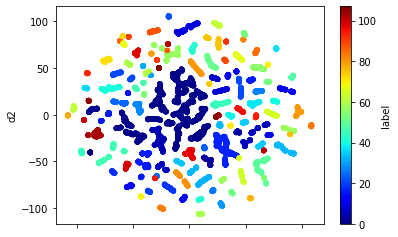

In [111]:
data.normalize('std') \
    .remove_outlires('lof') \
    .reduce('umap', n_components=10) \
    .cluster('dbscan', eps=0.75, min_samples=5) \
    .visualize('tsne')

### corelationg with target class

In [128]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('dbscan', eps=0.75, min_samples=5) \
    .score('v', label='visitor')

0.039571515331272435

In [130]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('dbscan', eps=0.75, min_samples=5) \
    .score('v', label='revenue')

0.009904945463892636

In [131]:
data.normalize('std') \
    .reduce('umap', n_components=5) \
    .cluster('dbscan', eps=0.75, min_samples=5) \
    .score('v', label='weekend')

0.006775917781040017

## Cross methods

In [137]:
results = Analysis({
   'dbscan':[data.normalize('std') \
                  .remove_outlires('lof') \
                  .reduce('umap', n_components=10, random_state=i) \
                  .cluster('dbscan', eps=0.75, min_samples=5) \
                  .score('silhouette').mean() for i in range(30)], \
    'prim': [data.normalize('std') \
                 .remove_outlires('lof') \
                 .reduce('umap', n_components=40, random_state=i) \
                 .cluster('prim', cutoff_scale=0.8) \
                 .score('silhouette').mean() for i in range(30)], \
    'louvain': [data.normalize('std') \
                 .remove_outlires('lof') \
                 .reduce('umap', n_components=15, random_state=i) \
                 .cluster('louvain', modularity='newman') \
                 .score('silhouette').mean() for i in range(30)], \
    'gmm': [data.normalize('std') \
                 .reduce('umap', n_components=5, random_state=i) \
                 .cluster('gmm', n_components=7) \
                 .score('silhouette').mean() for i in range(30)], \
    'kmeans': [data.normalize('std') \
                 .reduce('umap', n_components=5, random_state=i) \
                 .cluster('kmeans', n_clusters=7) \
                 .score('silhouette').mean() for i in range(30)], \
               
})

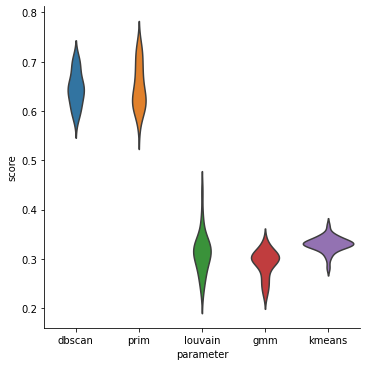

In [138]:
results.plot()

In [139]:
results.mean()

dbscan     0.645625
prim       0.649915
louvain    0.312437
gmm        0.291504
kmeans     0.329945
dtype: float64

In [140]:
results.annova()

(850.8931475694837, 1.4747136099686493e-99)

In [141]:
results.scheffe()

,dbscan,prim,louvain,gmm,kmeans
dbscan,1.000000e+00,9.938397e-01,4.729807e-73,1.538784e-76,5.377635e-70
prim,9.938397e-01,1.000000e+00,8.827126e-74,3.114989e-77,9.324178e-71
louvain,4.729807e-73,8.827126e-74,1.000000e+00,2.490945e-01,4.344528e-01
gmm,1.538784e-76,3.114989e-77,2.490945e-01,1.000000e+00,1.581232e-03
kmeans,5.377635e-70,9.324178e-71,4.344528e-01,1.581232e-03,1.000000e+00
